<a href="https://colab.research.google.com/github/Amr-187/AI-ML-Bootcamp/blob/main/Diabetes_Prediction_Amrina_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
df=pd.read_csv('/content/drive/MyDrive/AI & ML Bootcamp 2024/Class 4_SVM/diabetes_dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [8]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [9]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
             87       0              23             0        28.9  0.773                     25   0          1
                      58             16             52       32.7  0.166                     25   0          1
17           163      72             41             114      40.9  0.817                     47   1          1
Name: count, Length: 768, dtype: int64

In [10]:
for col in df.select_dtypes(include='object'):
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")

In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

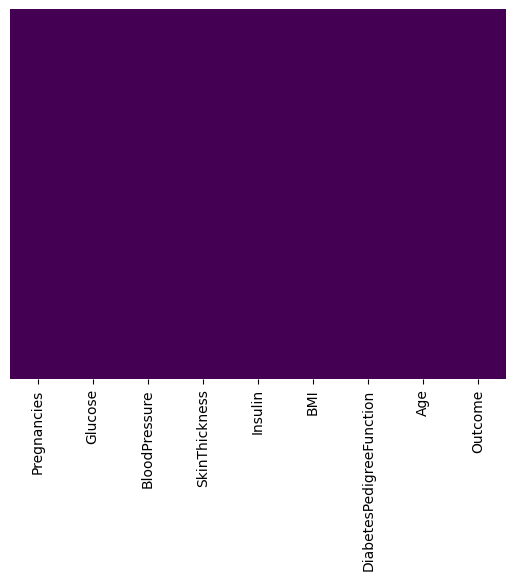

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
X= df.drop('Outcome',axis=1)
y=df['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model_DT=DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred=model_DT.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7012987012987013


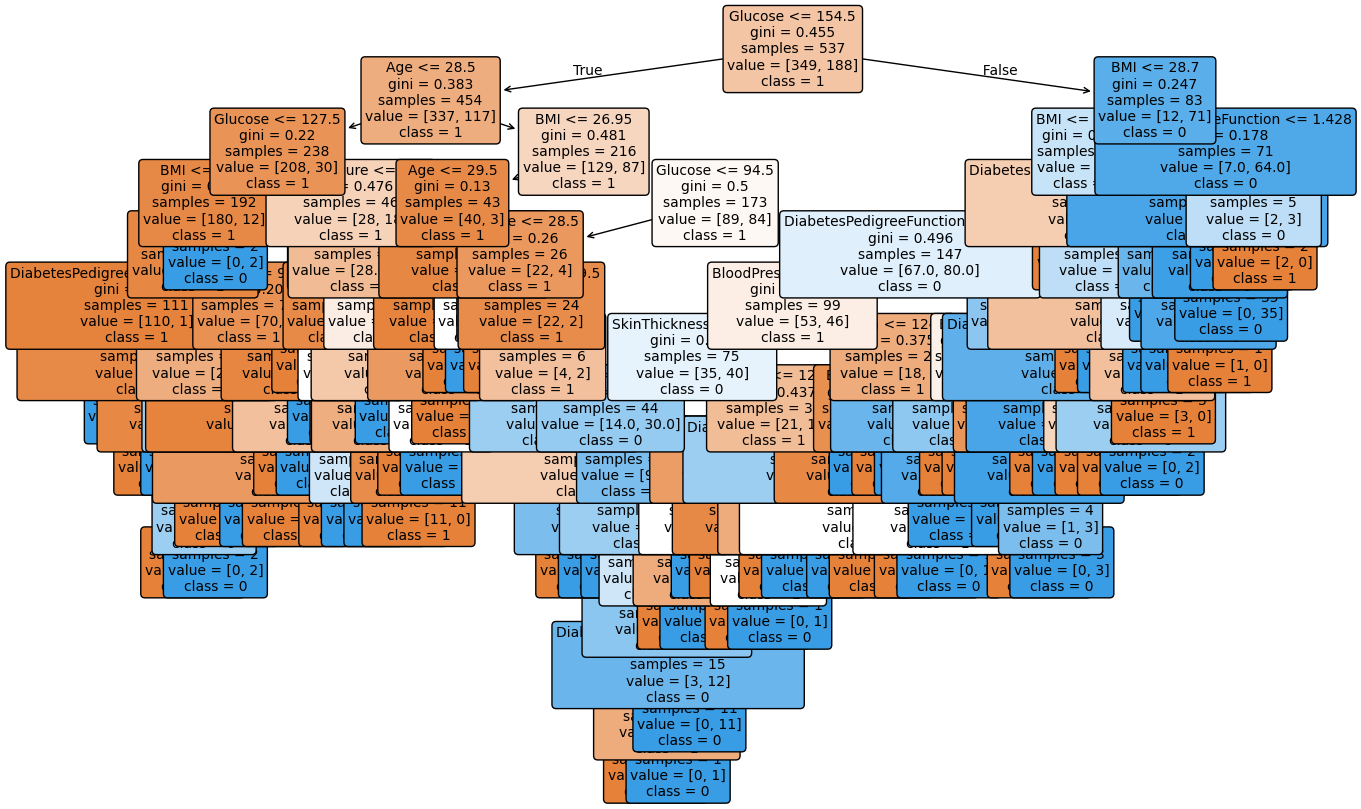

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
class_names = [str(c) for c in y.unique()]

plot_tree(model_DT, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=10)
plt.show()


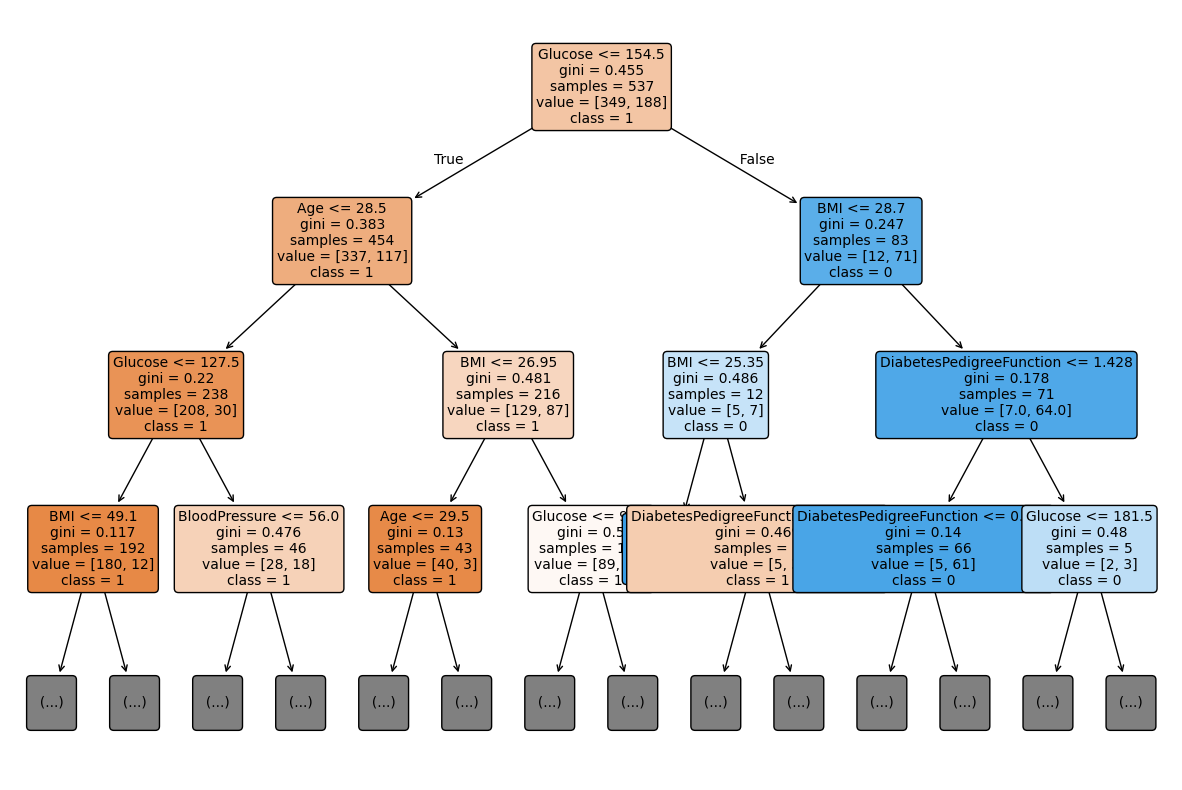

In [19]:
plt.figure(figsize=(15,10))
plot_tree(model_DT, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, fontsize=10,max_depth=3)
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gboost=GradientBoostingClassifier(random_state=42)


In [22]:
gboost.fit(X_train,y_train)
y_pred=gboost.predict(X_test)

In [23]:
accuracy_gboost = accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy of gboost: {accuracy_gboost:.2f}")


Accuracy of gboost: 0.75


In [24]:
print(f"Classification Report of gboost:\n{report}")

Classification Report of gboost:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [25]:
comparison=pd.DataFrame({'Actual Outcome': y_test,'Predicted Outcome': y_pred})
comparison

,Actual Outcome,Predicted Outcome
668,0,1
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
619,1,0
198,1,0
538,0,0
329,0,0
